<a href="https://colab.research.google.com/github/Jay06eng/Machine-Learning/blob/main/LEC_3_Python_on_SuperStore_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Python for Data Analytics**

using [Superstore Marketing Campaign Dataset](https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset)

---



##UPLOADING DATA

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving SuperStore-Data.csv to SuperStore-Data.csv


In [ ]:
# Importing data
Data = 'SuperStore-Data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(Data)

# Display the first few rows of the DataFrame
df


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,D,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,S,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,M,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,T,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,S,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,10142,1976,PhD,D,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2234,5263,1977,2n Cycle,M,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2235,22,1976,Graduation,D,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2236,528,1978,Graduation,M,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


##Check all column names.

You will need it a lot.

In [ ]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

## Getting the unique observations from the categorical data

In [ ]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

###Trying on Education

NOTES: <br>
<br>Basic Education: Typically refers to primary and secondary education.

<br>Graduation: This could refer to completing a bachelor's degree.

<br>2n Cycle: This likely refers to the second cycle of higher education, often associated with master's level programs.

<br>Master: Indicates the completion of a master's degree.

<br>PhD: Indicates the completion of a doctoral (PhD) program.

<br> <br>

Further Concept:

**First Cycle:** The first cycle usually refers to the initial stage of higher education, leading to a bachelor's degree. It typically lasts three to four years, depending on the country and the program of study. During this cycle, students acquire foundational knowledge and skills in their chosen field of study.<br>

**Second Cycle:** The second cycle refers to the stage of higher education that follows the first cycle and leads to a master's degree. It typically lasts one to two years and allows students to deepen their understanding and expertise in a specific area of study through advanced coursework, research, and/or practical experience.<br>

**Third Cycle:** The third cycle refers to doctoral studies or PhD programs. This cycle focuses on advanced research and the development of original contributions to knowledge within a particular academic discipline. Doctoral students typically engage in independent research under the guidance of a supervisor and produce a dissertation or thesis as the culmination of their studies.

Assuming that master's belong to 2n cycle. Our data overlaps. What do we do?

In [ ]:
df['Education']= df['Education'].replace('Master', '2n Cycle')

In [ ]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Basic'], dtype=object)

#CHALLENGE 1

The term 'Graduation also looks weird. Try changing it to 'Bachelor's'

In [ ]:
df['Education']= df['Education'].replace('Graduation', "Bachelor's")

In [ ]:
df['Education'].unique()

array(["Bachelor's", 'PhD', '2n Cycle', 'Basic'], dtype=object)

###Now we will try to extract a part of the observation.

Example, we only need the year from Dt_Customer. We will use the *str.split()* function.

In [ ]:
df['Yr_Customer'] = df['Dt_Customer'].str.split("/", expand = True)[2]

In [ ]:
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Yr_Customer
0,1826,1970,Bachelor's,D,84835.0,0,0,6/16/2014,0,189,...,189,218,1,4,4,6,1,1,0,2014
1,1,1961,Bachelor's,S,57091.0,0,0,6/15/2014,0,464,...,0,37,1,7,3,7,5,1,0,2014
2,10476,1958,Bachelor's,M,67267.0,0,1,5/13/2014,0,134,...,2,30,1,3,2,5,2,0,0,2014
3,1386,1967,Bachelor's,T,32474.0,1,1,11/5/2014,0,10,...,0,0,1,1,0,2,7,0,0,2014
4,5371,1989,Bachelor's,S,21474.0,1,0,8/4/2014,0,6,...,0,34,2,3,1,2,7,1,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,10142,1976,PhD,D,66476.0,0,1,7/3/2013,99,372,...,48,78,2,5,2,11,4,0,0,2013
2234,5263,1977,2n Cycle,M,31056.0,1,0,1/22/2013,99,5,...,8,16,1,1,0,3,8,0,0,2013
2235,22,1976,Bachelor's,D,46310.0,1,0,3/12/2012,99,185,...,5,14,2,6,1,5,8,0,0,2012
2236,528,1978,Bachelor's,M,65819.0,0,0,11/29/2012,99,267,...,165,63,1,5,4,10,3,0,0,2012




1. df['Dt_Customer']: This part accesses a column named 'Dt_Customer' in a DataFrame called 'df'. In Pandas, a DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. <br>

2. .str: This indicates that we are treating the elements of the 'Dt_Customer' column as strings. Pandas provides a set of vectorized string functions for Series and Indexes labeled as .str.<br>

3. .split("/"): This splits each string in the 'Dt_Customer' column using the '/' character as the separator. This would split a date string like "YYYY/MM/DD" into a list of substrings like ["YYYY", "MM", "DD"].<br>

4. expand = True: This parameter, when set to True, tells Pandas to expand the result of the split operation into separate columns. So, instead of having a single column with lists of substrings, you get separate columns for each substring.<br>

5. [2]: This part selects the third element from the resulting list of substrings, which would be the year in this case. Remember, Python uses zero-based indexing, so the first element is at index 0, the second at index 1, and so on.<br>

6. df['Yr_Customer'] = ...: Finally, the result of this operation is assigned to a new column called 'Yr_Customer' in the DataFrame 'df'. This new column will contain only the years extracted from the 'Dt_Customer' column.<br>

7. In summary, this line of code extracts the year from each date in the 'Dt_Customer' column and stores it in a new column called 'Yr_Customer' in the same DataFrame.

##Dealing with dates

In [ ]:
type(df['Dt_Customer'])

pandas.core.series.Series

In [ ]:
df.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
Yr_Customer             object
dtype: object

##Converting data to datetime format

In [ ]:
from numpy import datetime64

df['Dt_Customer'] = df['Dt_Customer'].astype('datetime64[ns]')

[ns]: Stands for nanoseconds. It specifies the precision of the datetime object, meaning it stores the date and time information down to the nanosecond level. This is the default and most common precision used in Pandas.

In [ ]:
df.dtypes

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
Yr_Customer                    object
dtype: object

In [ ]:
df= df.astype({
    "Dt_Customer": "datetime64[ns]",
    "Yr_Customer": "datetime64[ns]",})

In [ ]:
df.dtypes

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
Yr_Customer            datetime64[ns]
dtype: object

##Extracting information from dates#

In [ ]:
df['Dt_Customer'].dt.year

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
2233    2013
2234    2013
2235    2012
2236    2012
2237    2012
Name: Dt_Customer, Length: 2238, dtype: int32

In [ ]:
df['Dt_Customer'].dt.day

0       16
1       15
2       13
3        5
4        4
        ..
2233     3
2234    22
2235    12
2236    29
2237     9
Name: Dt_Customer, Length: 2238, dtype: int32

In [ ]:
df['Dt_Customer'].dt.month

0        6
1        6
2        5
3       11
4        8
        ..
2233     7
2234     1
2235     3
2236    11
2237     1
Name: Dt_Customer, Length: 2238, dtype: int32

# Alternate approach: `df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']) `

#CHALLENGE 2:

Create a new column ['Month'] that contains the month number, as what we did above. Then, create another column ['Month_Name'], convert the numbers into month names using only the codes we used in this lecture.

In [ ]:
df['Month'] = df['Dt_Customer'].dt.month
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Yr_Customer,Month
0,1826,1970,Bachelor's,D,84835.0,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,2014-01-01,6
1,1,1961,Bachelor's,S,57091.0,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,2014-01-01,6
2,10476,1958,Bachelor's,M,67267.0,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,2014-01-01,5
3,1386,1967,Bachelor's,T,32474.0,1,1,2014-11-05,0,10,...,0,1,1,0,2,7,0,0,2014-01-01,11
4,5371,1989,Bachelor's,S,21474.0,1,0,2014-08-04,0,6,...,34,2,3,1,2,7,1,0,2014-01-01,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,10142,1976,PhD,D,66476.0,0,1,2013-07-03,99,372,...,78,2,5,2,11,4,0,0,2013-01-01,7
2234,5263,1977,2n Cycle,M,31056.0,1,0,2013-01-22,99,5,...,16,1,1,0,3,8,0,0,2013-01-01,1
2235,22,1976,Bachelor's,D,46310.0,1,0,2012-03-12,99,185,...,14,2,6,1,5,8,0,0,2012-01-01,3
2236,528,1978,Bachelor's,M,65819.0,0,0,2012-11-29,99,267,...,63,1,5,4,10,3,0,0,2012-01-01,11


OPTION 1: Manual and one by one

In [ ]:
df['Month_Name'] = df['Month'].replace(1, "January")
df['Month_Name'] = df['Month_Name'].replace(2, "February")
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Yr_Customer,Month,Month_Name
0,1826,1970,Bachelor's,D,84835.0,0,0,2014-06-16,0,189,...,1,4,4,6,1,1,0,2014-01-01,6,6
1,1,1961,Bachelor's,S,57091.0,0,0,2014-06-15,0,464,...,1,7,3,7,5,1,0,2014-01-01,6,6
2,10476,1958,Bachelor's,M,67267.0,0,1,2014-05-13,0,134,...,1,3,2,5,2,0,0,2014-01-01,5,5
3,1386,1967,Bachelor's,T,32474.0,1,1,2014-11-05,0,10,...,1,1,0,2,7,0,0,2014-01-01,11,11
4,5371,1989,Bachelor's,S,21474.0,1,0,2014-08-04,0,6,...,2,3,1,2,7,1,0,2014-01-01,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,10142,1976,PhD,D,66476.0,0,1,2013-07-03,99,372,...,2,5,2,11,4,0,0,2013-01-01,7,7
2234,5263,1977,2n Cycle,M,31056.0,1,0,2013-01-22,99,5,...,1,1,0,3,8,0,0,2013-01-01,1,January
2235,22,1976,Bachelor's,D,46310.0,1,0,2012-03-12,99,185,...,2,6,1,5,8,0,0,2012-01-01,3,3
2236,528,1978,Bachelor's,M,65819.0,0,0,2012-11-29,99,267,...,1,5,4,10,3,0,0,2012-01-01,11,11


OPTION 2: Mapping

In [ ]:
# Replace numeric values in 'Month' with month names using .replace
df['Month_Name'] = df['Month'].replace({1: 'January',
                                        2: 'February',
                                        3: 'March',
                                        4: 'April',
                                        5: 'May',
                                        6: 'June',
                                        7: 'July',
                                        8: 'August',
                                        9: 'September',
                                        10: 'October',
                                        11: 'November',
                                        12: 'December'})
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Yr_Customer,Month,Month_Name
0,1826,1970,Bachelor's,D,84835.0,0,0,2014-06-16,0,189,...,1,4,4,6,1,1,0,2014-01-01,6,June
1,1,1961,Bachelor's,S,57091.0,0,0,2014-06-15,0,464,...,1,7,3,7,5,1,0,2014-01-01,6,June
2,10476,1958,Bachelor's,M,67267.0,0,1,2014-05-13,0,134,...,1,3,2,5,2,0,0,2014-01-01,5,May
3,1386,1967,Bachelor's,T,32474.0,1,1,2014-11-05,0,10,...,1,1,0,2,7,0,0,2014-01-01,11,November
4,5371,1989,Bachelor's,S,21474.0,1,0,2014-08-04,0,6,...,2,3,1,2,7,1,0,2014-01-01,8,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,10142,1976,PhD,D,66476.0,0,1,2013-07-03,99,372,...,2,5,2,11,4,0,0,2013-01-01,7,July
2234,5263,1977,2n Cycle,M,31056.0,1,0,2013-01-22,99,5,...,1,1,0,3,8,0,0,2013-01-01,1,January
2235,22,1976,Bachelor's,D,46310.0,1,0,2012-03-12,99,185,...,2,6,1,5,8,0,0,2012-01-01,3,March
2236,528,1978,Bachelor's,M,65819.0,0,0,2012-11-29,99,267,...,1,5,4,10,3,0,0,2012-01-01,11,November


OPTION 3: String Format Time

In [ ]:
df['Dt_Customer'].dt.strftime('%B')

###STRING FORMAT TIME CHEAT SHEET

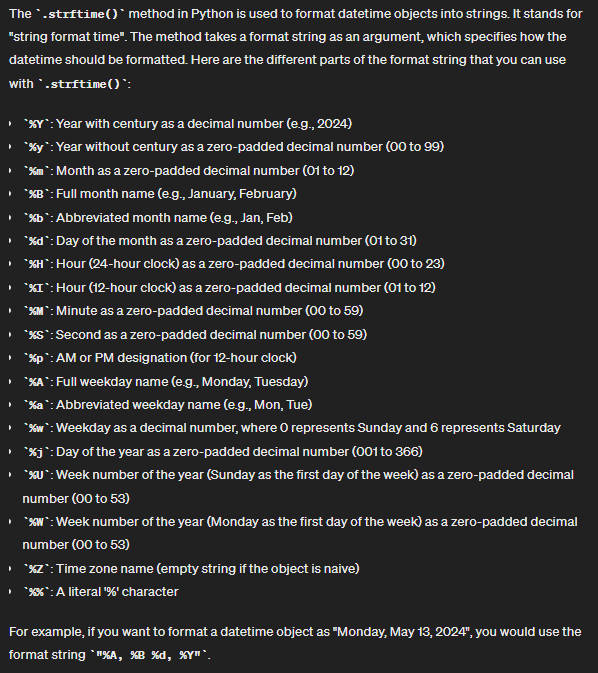

In [ ]:
# Extract the 'Month' column
month_column = df.pop('Month_Name')

# Insert the 'Month' column at the desired position
df.insert(2, 'Month_Name', month_column)

#MISSING VALUES

**NaN** stands for "Not a Number" and is a standard IEEE floating-point representation of an undefined or unrepresentable value for floating-point elements. (ex. 0/0)
<br><br>
**NA** is a more general notation that stands for "Not Available" and is used in pandas to represent missing values across different data types, not just floating-point numbers.

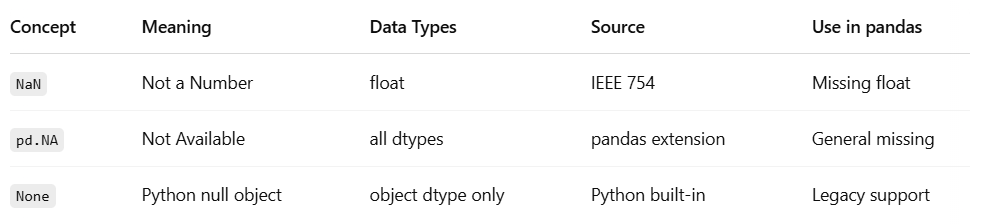

Pandas provides functions like *isna()* and *notna()* to check for missing values, and these functions treat NaN and NA as equivalent.

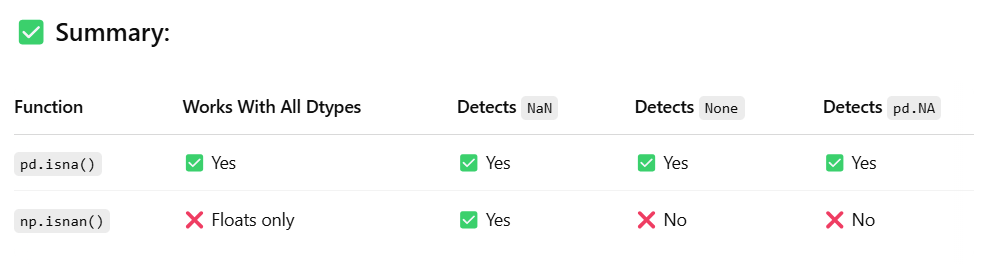

In [ ]:
df.isna()

,Id,Year_Birth,Month_Name,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Yr_Customer,Month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2234,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.notna()

,Id,Year_Birth,Month_Name,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Yr_Customer,Month
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2234,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2235,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2236,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
df.isna().sum()

Id                      0
Year_Birth              0
Month_Name              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
Yr_Customer             0
Month                   0
dtype: int64

In [ ]:
df.notna().sum()

Id                     2238
Year_Birth             2238
Month_Name             2238
Education              2238
Marital_Status         2238
Income                 2214
Kidhome                2238
Teenhome               2238
Dt_Customer            2238
Recency                2238
MntWines               2238
MntFruits              2238
MntMeatProducts        2238
MntFishProducts        2238
MntSweetProducts       2238
MntGoldProds           2238
NumDealsPurchases      2238
NumWebPurchases        2238
NumCatalogPurchases    2238
NumStorePurchases      2238
NumWebVisitsMonth      2238
Response               2238
Complain               2238
Yr_Customer            2238
Month                  2238
dtype: int64

##Dropping rows/observations with missing values

###.dropna()

PARAMETERS: <br><br>
**axis** - will we remove rows or columns? The default is 0, means we remove rows.

*axis = 0* - remove rows with missing values [THIS IS THE DEFAULT]
<br>*axis = 1* - remove columns with missing values

<br><br>
**how** - conditions whether we want it all or any

*how = any* - drops with at least one missing value [THIS IS THE DEFAULT]
<br>*how = all* - only drops when ALL values in row/column are missing

There is another parameter called 'tresh' which we can't apply in this dataset.
<br>
Tresh can set a threshold value for dropping. For instance, if we set the thresh parameter to 4, a row must have at least four non-missing values to not be dropped.

**inplace** - modifies our df
*inplace=True* - will modify our dataframe
*inplace=False* - will not modify our dataframe [THIS IS THE DEFAULT]


```
# Drop rows that have less than 4 non-missing values
print(df.dropna(thresh=4))
```



In [ ]:
# Drop rows that have at least one missing value
# This does not update our df
df.dropna(axis=0, how="any")

,Id,Year_Birth,Month_Name,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Yr_Customer,Month
0,1826,1970,June,Bachelor's,D,84835.0,0,0,2014-06-16,0,...,218,1,4,4,6,1,1,0,2014-01-01,6
1,1,1961,June,Bachelor's,S,57091.0,0,0,2014-06-15,0,...,37,1,7,3,7,5,1,0,2014-01-01,6
2,10476,1958,May,Bachelor's,M,67267.0,0,1,2014-05-13,0,...,30,1,3,2,5,2,0,0,2014-01-01,5
3,1386,1967,November,Bachelor's,T,32474.0,1,1,2014-11-05,0,...,0,1,1,0,2,7,0,0,2014-01-01,11
4,5371,1989,August,Bachelor's,S,21474.0,1,0,2014-08-04,0,...,34,2,3,1,2,7,1,0,2014-01-01,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,10142,1976,July,PhD,D,66476.0,0,1,2013-07-03,99,...,78,2,5,2,11,4,0,0,2013-01-01,7
2234,5263,1977,January,2n Cycle,M,31056.0,1,0,2013-01-22,99,...,16,1,1,0,3,8,0,0,2013-01-01,1
2235,22,1976,March,Bachelor's,D,46310.0,1,0,2012-03-12,99,...,14,2,6,1,5,8,0,0,2012-01-01,3
2236,528,1978,November,Bachelor's,M,65819.0,0,0,2012-11-29,99,...,63,1,5,4,10,3,0,0,2012-01-01,11


In [ ]:
df.isna().sum()

Id                      0
Year_Birth              0
Month_Name              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
Yr_Customer             0
Month                   0
dtype: int64

In [ ]:
#This will modify our df
df.dropna(axis=0, how="any", inplace=True)

In [ ]:
df.isna().sum()

Id                     0
Year_Birth             0
Month_Name             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
Yr_Customer            0
Month                  0
dtype: int64

#Replacing the missing values

fillna()

since we will need to replace values with numerical data, we will need numpy or numerical python - you'll know it's numpy when you see "np" in the syntax

In [ ]:
import numpy as np

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv(Data)

In [ ]:
df["Income"].fillna(value = df["Income"].mean())

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2233    66476.0
2234    31056.0
2235    46310.0
2236    65819.0
2237    94871.0
Name: Income, Length: 2238, dtype: float64

In [ ]:
df.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [ ]:
df["Income"].fillna(value = df["Income"].mean(), inplace=True)

In [ ]:
df.isna().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

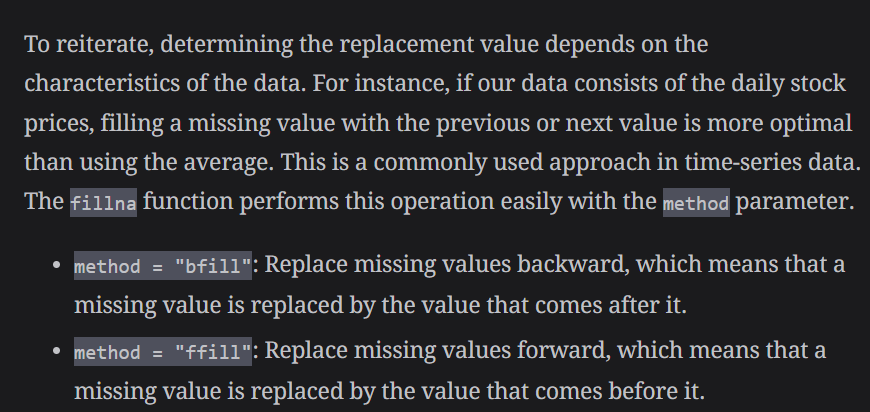

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv(Data)

In [ ]:
df["Income"].fillna(method='bfill', inplace=True)
df.isna().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

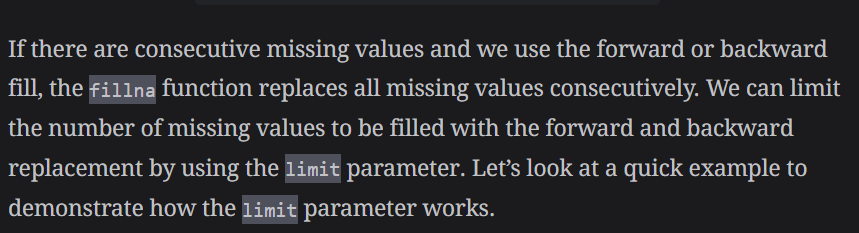

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv(Data)

In [ ]:
df["Income"].fillna(method='bfill', limit=1, inplace=True)
df.isna().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

Trying simple data to show difference

In [ ]:
#try that with a simpler data

# Create a DataFrame with missing values
data = {
    'ID': [1, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Income': [1000, np.nan, 2000, np.nan, 5000]
}

df = pd.DataFrame(data)

df

,ID,Name,Income
0,1,Alice,1000.0
1,2,Bob,NaN
2,3,Charlie,2000.0
3,4,David,NaN
4,5,Eve,5000.0


In [ ]:
df_copy = df.copy()
df_copy["Income"].fillna(method='bfill', inplace=True)
df_copy

,ID,Name,Income
0,1,Alice,1000.0
1,2,Bob,2000.0
2,3,Charlie,2000.0
3,4,David,5000.0
4,5,Eve,5000.0


In [ ]:
# Create a DataFrame with missing values
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'John', 'Alex'],
    'Income': [1000, np.nan, np.nan, np.nan, 2000, np.nan, 5000]
}

df = pd.DataFrame(data)

df

,ID,Name,Income
0,1,Alice,1000.0
1,2,Bob,NaN
2,3,Charlie,NaN
3,4,David,NaN
4,5,Eve,2000.0
5,6,John,NaN
6,7,Alex,5000.0


In [ ]:
# Demonstrate fillna with limit
df_copy2 = df.copy()
df_copy2["Income"].fillna(method='bfill', limit=1, inplace=True)
df_copy2

,ID,Name,Income
0,1,Alice,1000.0
1,2,Bob,NaN
2,3,Charlie,NaN
3,4,David,2000.0
4,5,Eve,2000.0
5,6,John,5000.0
6,7,Alex,5000.0


#.groupby()

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv(Data)

In [ ]:
print(df.groupby("Education").mean())

TypeError: Could not convert MMSMSDMSMDSSMMMWSTMMTMTTTTTMMMMTDTMTMDMTMDMSMTSDDSTTMMMTTSMMMSSTTDTSSDDTTTMMMMMSTMSMMMMMMTMMTDSSSMMTSDTMMSMSTTSDTDSTTDDTMMTWMSDMSSMMWTSMMTTSTSSTMDMMMTSMMDTTTMSDWTMMSMMMDTTSMSMMTTTTDMMTTMTMMMTMTWTSMMTMMDM to numeric

In [ ]:
# Group the DataFrame by both "Education" and "Marital Status" columns
grouped_means = df.groupby(["Education", "Marital Status"]).mean()

print(grouped_means)

Be careful, if certain objects are not asigned the correct type, you might mess up your data. For instance, if Year_Birth is not in date format, you'll get the mean of it as well. Like what happened above.

#CHALLENGE 3:

We can also select only the columns we want. But first, can you try to only show Education and Income?
*<br>Hint: [A,B] would not work but [[A,B]] will.*

In [ ]:
print(df[['Education',"Income"]].groupby("Education").mean())

                  Income
Education               
2n Cycle    47633.190000
Basic       20306.259259
Graduation  52720.373656
Master      52917.534247
PhD         56177.519833


##GROUPBY AGGREGATION

In [ ]:
print(
    df.groupby('Education').agg(
        avg_income = ('Income', 'mean'))
)

              avg_income
Education               
2n Cycle    47633.190000
Basic       20306.259259
Graduation  52720.373656
Master      52917.534247
PhD         56177.519833


In [ ]:
print(
    df.groupby('Education').agg(
        avg_income = ('Income', 'mean'),
        total_income = ("Income", "sum"))
)

              avg_income  total_income
Education                             
2n Cycle    47633.190000     9526638.0
Basic       20306.259259     1096538.0
Graduation  52720.373656    58835937.0
Master      52917.534247    19314900.0
PhD         56177.519833    26909032.0


we can sort too!

In [ ]:
print(
    df.groupby('Education').agg(
        avg_income = ('Income', 'mean'),
        total_income = ("Income", "sum")).sort_values(by='total_income')
)

              avg_income  total_income
Education                             
Basic       20306.259259     1096538.0
2n Cycle    47633.190000     9526638.0
Master      52917.534247    19314900.0
PhD         56177.519833    26909032.0
Graduation  52720.373656    58835937.0


In [ ]:
print(
    df.groupby('Education').agg(
        avg_income = ('Income', 'mean'),
        total_income = ("Income", "sum")
        ).sort_values(by='total_income',ascending=False)
)

              avg_income  total_income
Education                             
Graduation  52720.373656    58835937.0
PhD         56177.519833    26909032.0
Master      52917.534247    19314900.0
2n Cycle    47633.190000     9526638.0
Basic       20306.259259     1096538.0


we can also group by PAIRS of two columns

In [ ]:
print(
    df.groupby(['Education', 'Marital_Status']).agg(
        avg_income = ('Income', 'mean'),
        total_income = ("Income", "sum")
        ).sort_values(by='total_income',ascending=False)
)

                             avg_income  total_income
Education  Marital_Status                            
Graduation M               50800.258741    21793311.0
           T               55758.480702    15891167.0
           S               51322.182927    12625257.0
PhD        M               58138.031579    11046226.0
Master     M               53286.028986     7353472.0
PhD        T               56041.422414     6500805.0
Graduation D               54526.042017     6488599.0
Master     T               52109.009804     5315119.0
PhD        S               53314.614583     5118203.0
Master     S               53530.560000     4014792.0
2n Cycle   M               46201.100000     3696088.0
PhD        D               53096.615385     2761024.0
2n Cycle   T               44736.410714     2505239.0
           S               53673.944444     1932262.0
Graduation W               54976.657143     1924183.0
Master     D               50331.945946     1862282.0
PhD        W               6